In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
DATA_DIR = Path("data/raw")

train = pd.read_csv(DATA_DIR / "mitbih_train.csv", header=None)0
test = pd.read_csv(DATA_DIR / "mitbih_test.csv", header=None)

X_train_full = train.iloc[:, :-1].values
y_train_full = train.iloc[:, -1].astype(int).values

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].astype(int).values

print(train.shape, test.shape)
print(sorted(np.unique(y_train_full)))
print(pd.Series(y_train_full).value_counts().sort_index())
print(train.isna().sum().sum(), test.isna().sum().sum())


(87553, 188) (21891, 188)
[0, 1, 2, 3, 4]
0    72470
1     2223
2     5788
3      641
4     6431
Name: count, dtype: int64
0 0


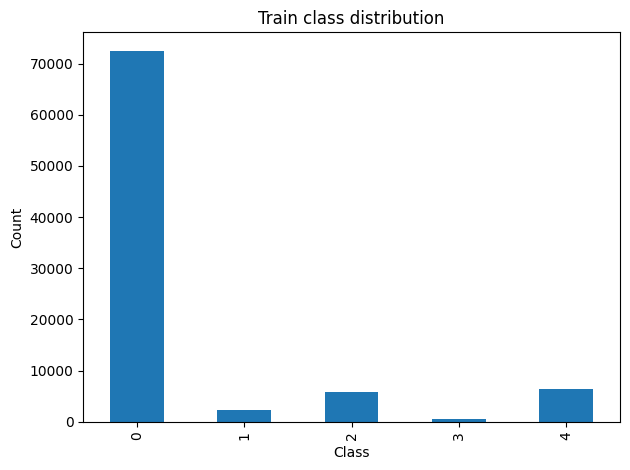

In [7]:
counts = pd.Series(y_train_full).value_counts().sort_index()

plt.figure()
counts.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Train class distribution")
plt.tight_layout()
plt.show()


In [8]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)

print(X_tr.shape, X_val.shape)


(70042, 187) (17511, 187)


In [9]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_tr, y_tr)


RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

VAL accuracy: 0.9756724344697618
              precision    recall  f1-score   support

           0     0.9737    0.9988    0.9861     14494
           1     0.9676    0.6045    0.7441       445
           2     0.9828    0.8877    0.9328      1158
           3     0.9302    0.6250    0.7477       128
           4     0.9984    0.9580    0.9778      1286

    accuracy                         0.9757     17511
   macro avg     0.9705    0.8148    0.8777     17511
weighted avg     0.9756    0.9757    0.9741     17511



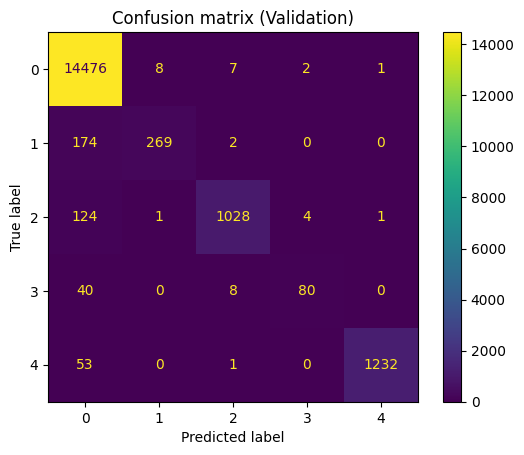

In [10]:
val_pred = rf.predict(X_val)

print("VAL accuracy:", accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_val, val_pred)
plt.title("Confusion matrix (Validation)")
plt.show()


TEST accuracy: 0.9716778584806541
              precision    recall  f1-score   support

           0     0.9698    0.9990    0.9842     18117
           1     0.9696    0.5737    0.7209       556
           2     0.9835    0.8660    0.9210      1448
           3     0.8125    0.5617    0.6642       162
           4     0.9967    0.9384    0.9667      1608

    accuracy                         0.9717     21891
   macro avg     0.9464    0.7878    0.8514     21891
weighted avg     0.9715    0.9717    0.9697     21891



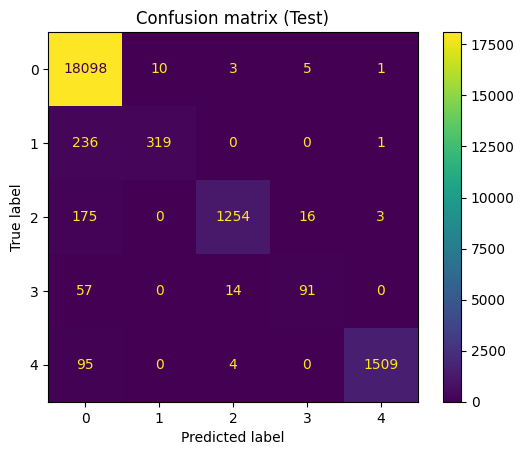

In [11]:
test_pred = rf.predict(X_test)

print("TEST accuracy:", accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, test_pred)
plt.title("Confusion matrix (Test)")
plt.show()


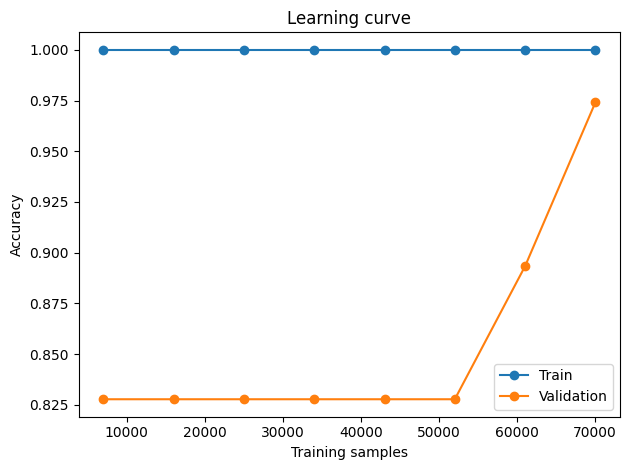

In [12]:
train_sizes, train_scores, val_scores = learning_curve(
    rf,
    X_train_full,
    y_train_full,
    train_sizes=np.linspace(0.1, 1.0, 8),
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, marker="o")
plt.plot(train_sizes, val_mean, marker="o")
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.title("Learning curve")
plt.legend(["Train", "Validation"])
plt.tight_layout()
plt.show()
